In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

price = pd.read_table('pricelist.csv',delimiter =';')
combi = pd.read_table('Historical_combi2.csv',delimiter =';')
I_2011 = pd.read_table('MayaUSGC_2011.csv',delimiter =';')



In [2]:
I_2011

,Pred Year,Pred brent 2011,Pred FO 1% 2011,Pred FO 3.5% 2011,Pred Jet 2011,TD 2011,Actual 2011,MD 2011
0,2005,28.0,-5.70,-9.57,11.03,NaN,-12.5,NaN
1,2006,35.0,-5.74,-10.74,11.28,-6.39,-12.5,-7.17
2,2007,44.0,-8.58,-13.13,13.52,-7.50,-12.5,-9.01
3,2008,83.3,-13.55,-22.58,24.56,-15.42,-12.5,-12.54
4,2009,59.0,-9.26,-14.37,15.98,-8.55,-12.5,-8.57
5,2010,82.0,-7.32,-12.52,15.69,-7.91,-12.5,-8.20


In [3]:
import datetime
datetimes = [datetime.datetime.strptime(d, '%d.%m.%Y') for d in combi["Date"]]


df = pd.DataFrame(datetimes, columns=['date'])
df.loc[:, 'date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

combi = combi.assign(df=df['date'].values)
#print(combi)


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


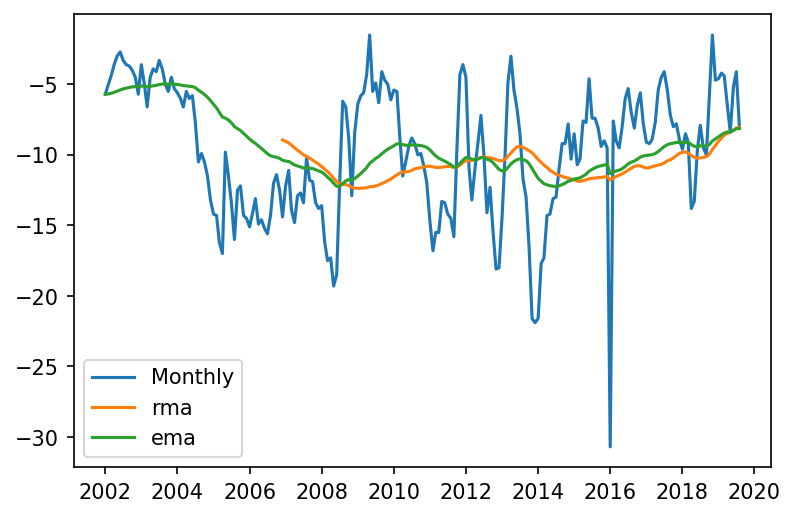

In [4]:
plt.rcParams['figure.dpi'] = 150

rma60 = combi["Maya USGC"].rolling(window=60).mean()
ema60 = combi["Maya USGC"].ewm(span=60, adjust=False).mean()
plt.plot(combi["df"],combi["Maya USGC"])
plt.plot(combi["df"],rma60)
plt.plot(combi["df"],ema60)
plt.legend(("Monthly","rma","ema"))
plt.show()

combi = combi.assign(ema60=ema60.values)
combi = combi.assign(rma60=rma60.values)

In [5]:
take = 2011

In [6]:
if take==2011: 
    ema=[combi[combi['df']=='2005-01-01']['ema60'].values,combi[combi['df']=='2006-01-01']['ema60'].values   \
     ,combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values  \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values]
    
elif take==2012:
        ema=[combi[combi['df']=='2006-01-01']['ema60'].values,combi[combi['df']=='2007-01-01']['ema60'].values   \
     ,combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values  \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values]
    
elif take==2013:
    ema=[combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values   \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values  \
     ,combi[combi['df']=='2011-01-01']['ema60'].values,combi[combi['df']=='2012-01-01']['ema60'].values]
    
else:
    ema=[combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values   \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values  \
     ,combi[combi['df']=='2012-01-01']['ema60'].values,combi[combi['df']=='2013-01-01']['ema60'].values]
    
ema

[array([-6.41353538]),
 array([-8.87989944]),
 array([-10.44164707]),
 array([-11.2198121]),
 array([-11.50415907]),
 array([-9.34673593])]

In [7]:
if take==2011: 
    rma=[combi[combi['df']=='2005-01-01']['rma60'].values,combi[combi['df']=='2006-01-01']['rma60'].values   \
     ,combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values  \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values]
    
elif take==2012:
        rma=[combi[combi['df']=='2006-01-01']['rma60'].values,combi[combi['df']=='2007-01-01']['rma60'].values   \
     ,combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values  \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values]
    
elif take==2013:
    rma=[combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values   \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values  \
     ,combi[combi['df']=='2011-01-01']['rma60'].values,combi[combi['df']=='2012-01-01']['rma60'].values]
    
else:
    rma=[combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values   \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values  \
     ,combi[combi['df']=='2012-01-01']['rma60'].values,combi[combi['df']=='2013-01-01']['rma60'].values]

rma

[array([nan]),
 array([nan]),
 array([-9.04666667]),
 array([-10.82]),
 array([-12.37]),
 array([-11.56666667])]